In [1]:
########### more simple ver
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [10]:
def _draw_graph(fpr, tpr, auc):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [12]:
def get_auc(label, score):
    y = np.array([0, 0, 1, 1])
    pred = np.array([0.1, 0.4, 0.35, 0.8])
    fpr, tpr, thresholds = metrics.roc_curve(label, pred)
    auc = metrics.auc(fpr, tpr)
    print(auc)
    print(fpr, tpr)
    _draw_graph(fpr, tpr, auc)

0.75
[ 0.   0.5  0.5  1. ] [ 0.5  0.5  1.   1. ]


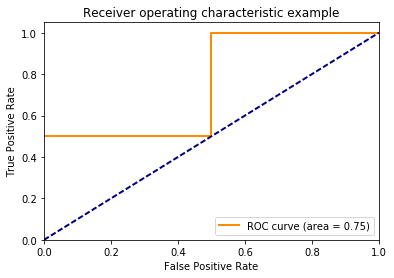

In [13]:
y = np.array([0, 0, 1, 1])
pred = np.array([0.1, 0.4, 0.35, 0.8])
get_auc(y, pred)